In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

from pca import PCA
import pyarrow.feather as feather

In [2]:
# Read using pyarrow
table = feather.read_table('word-embeddings.feather')
df = table.to_pandas()

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

embeddings_df = pd.DataFrame(df['vit'].tolist(), columns=[f'Embedding{i}' for i in range(512)])
df = pd.concat([df.drop(columns=['vit']), embeddings_df], axis=1)
embeddings_df = embeddings_df.values

PCA 2D

In [3]:
pca2d = PCA(2)
pca2d.fit(embeddings_df)
df_reduced_2d = pca2d.transform()

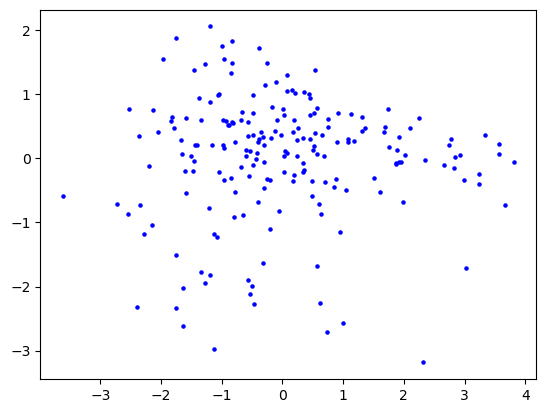

In [4]:
plt.figure()
plt.scatter(df_reduced_2d[:,0],df_reduced_2d[:,1],s=5,c='blue')
plt.savefig('figures/PCA_2D')
plt.show()

In [5]:
pca2d.checkPCA()

Reconstruction error = 0.15484522833637976


True

PCA 3D

In [6]:
pca3d = PCA(3)
pca3d.fit(embeddings_df)
df_reduced_3d = pca3d.transform()

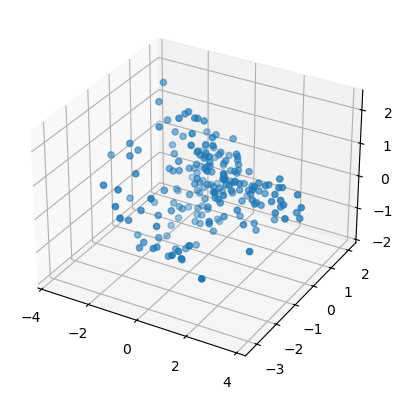

In [7]:
plt.figure().add_subplot(111,projection='3d').scatter(df_reduced_3d[:,0],df_reduced_3d[:,1],df_reduced_3d[:,2])
plt.savefig('figures/PCA_3D')

In [8]:
pca3d.checkPCA()

Reconstruction error = 0.15197906100699912


True

Scree Plot


In [9]:
pcaScree = PCA()
pcaScree.fit(embeddings_df)
Scree = pcaScree.Scree()

Plotting

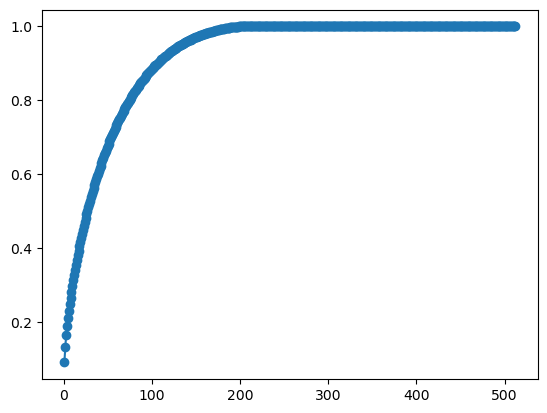

In [10]:
plt.figure()
plt.plot(range(1,len(Scree)+1),Scree,marker='o')
plt.savefig('figures/Scree_Plot')
plt.show()

Let's plot lesser values

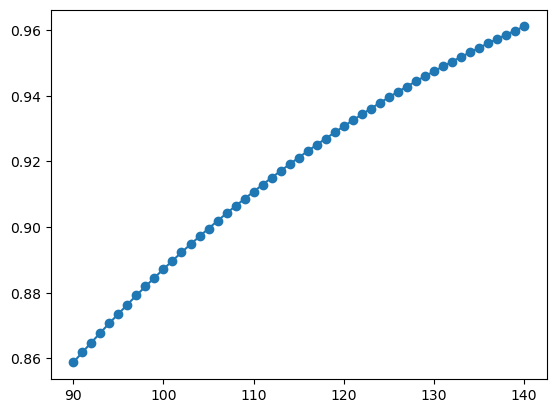

In [11]:
plt.figure()
num_values = 50
lower_bound = 90
plt.plot(range(lower_bound,lower_bound+num_values+1),Scree[lower_bound:lower_bound+num_values+1],marker='o')
# plt.savefig('figures/Task_6-2_Scree_less')
plt.show()

In [12]:
Slopes = np.diff(Scree)

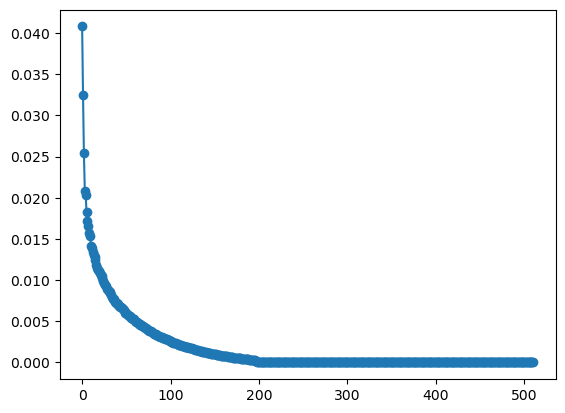

In [13]:
plt.figure()
plt.plot(Slopes[:],marker='o')
plt.show()

The point of the scree plot is to know how many dimensions to consider so that most amount of information of our dataset is retained.
In our case we see that somewhere aruond the value 100 or a little higher, the addition of information is very less, so increasing the dimensions beyond that point isn't worth the tradeoff between complexity of our model and the information retained.

In [14]:
optimum_dimensions = 100

In [15]:
pca = PCA(optimum_dimensions)
pca.fit(embeddings_df)
reduced_dataset = pca.transform()

In [16]:
print(pca.checkPCA())
print(reduced_dataset.shape)

Reconstruction error = 0.05649605035666856
True
(200, 100)
